In [1]:
from CompilerQC import *
import pickle
from pathlib import Path
import os
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import pandas as pd
import itertools
import shutil
from visualize_graphs import (
    without_compilation,
    advanced_plot_df,
    plot_settings_in_subplot,
)

In [2]:
# group settings by hand
number = 1
results = []
for idx, name in enumerate(
    os.listdir(paths.parameters_path / f"run_{number}/dictionaries")
):
    print(idx, name)
    results.append(name.split(".")[0])

i = 1
for name in os.listdir(paths.parameters_path / f"run_{number}/dictionaries")[
    i : (i + 1)
]:
    print(name)
    with open(paths.parameters_path / f"run_{number}/dictionaries/{name}", "rb") as f:
        new_dicts = pickle.load(f)
        for idx, setting in enumerate(new_dicts):
            print(f"=========={idx}=============")
            for k, v in setting.items():
                print(k, v)

0 McForLHZGraphs1.pkl
1 McForDatabase1.pkl
2 EnergyForLHZGraphs1.pkl
3 AdvancedMcForLHZGraphsWithCore1.pkl
McForDatabase1.pkl
==========0=============
swap_only_core_qbits_in_line_swaps False
==========1=============
swap_only_core_qbits_in_line_swaps True
==========2=============
swap_probability 0.05
decay_rate_of_swap_probability 0.95
==========3=============
swap_probability 0.1
decay_rate_of_swap_probability 0.95
==========4=============
swap_probability 0.15
decay_rate_of_swap_probability 0.95
==========5=============
swap_probability 0.3
decay_rate_of_swap_probability 0.95
==========6=============
shell_time 50
envelop_shell_search True
finite_grid_size False
==========7=============
shell_time 200
envelop_shell_search True
finite_grid_size False
==========8=============
shell_time 500
envelop_shell_search True
finite_grid_size False
==========9=============
random_qbit True
==========10=============
number_of_plaquettes_weight True
random_qbit False
==========11=============
sp

In [3]:
df = dict()
for name in results:
    try:
        dataframe = pd.read_csv(f"results_in_csvs/run_{number}/{name}.csv")
        #         N = dataframe.N
        #         C_3 = N - 2 + (N - 3)
        #         C_4 = (N - 3) * (N - 2) / 2 - (N - 3)
        #         dataframe['number_of_CNOTs_in_LHZ'] = (6 * C_4 + 4 * C_3)
        dataframe["qubit_ratio"] = dataframe.K / (dataframe.N / 2 * (dataframe.N - 1))
        dataframe["CNOT_ratio"] = (
            dataframe.number_of_CNOTs / dataframe.number_of_CNOTs_in_LHZ
        )
        df.update({name: dataframe})
    except:
        print(f"failed: {name}")
        pass

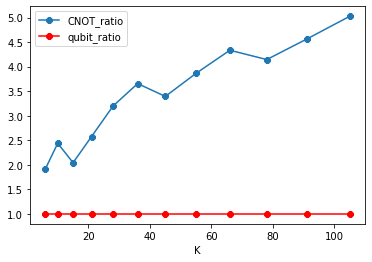

In [4]:
problem_folder = "lhz"
without_compilation(problem_folder)["CNOT_ratio"].plot(marker="8", label="CNOT_ratio")
without_compilation(problem_folder)["qubit_ratio"].plot(
    marker="8", color="red", label="qubit_ratio"
)
plt.legend()

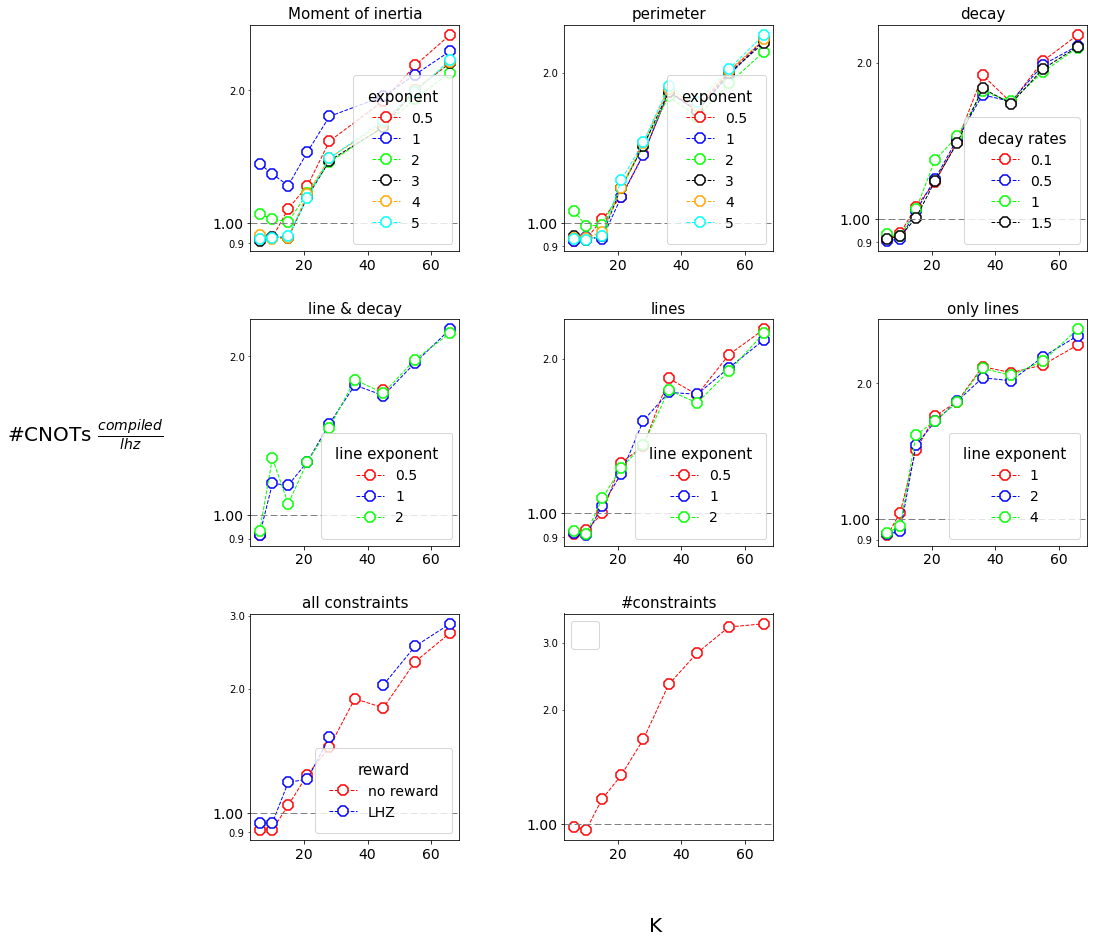

In [5]:
name = "EnergyForLHZGraphs1"
titles = [
    "Moment of inertia",
    "perimeter",
    #     "rewards",
    "decay",
    "line & decay",
    "lines",
    "only lines",
    "all constraints",
    "#constraints",
]
all_setting_numbers = [
    [0, 1, 2, 3, 4, 5],
    [6, 7, 8, 9, 10, 11],
    #     [12, 13, 14, 15],
    [16, 17, 18, 19],
    [20, 21, 22],
    [23, 24, 25],
    [26, 27, 28],
    [29, 30],
    [31],
]
all_setting_names = [
    [[0.5, 1, 2, 3, 4, 5], "exponent"],
    [[0.5, 1, 2, 3, 4, 5], "exponent"],
    #     [["no reward", "greedy", "LHZ", "initial energy"]],
    [[0.1, 0.5, 1, 1.5], "decay rates"],
    [[0.5, 1, 2], "line exponent"],
    [[0.5, 1, 2], "line exponent"],
    [[1, 2, 4], "line exponent"],
    [["no reward", "LHZ"], "reward"],
]
all_setting_names = all_setting_names + [[""]] * (
    len(all_setting_numbers) - len(all_setting_names)
)
nx, ny = 3, 3

all_setting_numbers_and_names = zip(all_setting_numbers, all_setting_names)

x_axis, y_axis = "K", "CNOT_ratio"
axs, min_indices = plot_settings_in_subplot(
    df, name, titles, all_setting_numbers_and_names, x_axis, y_axis, nx, ny
)
axs[2, 2].set_axis_off()

plt.savefig(paths.plots / f"ThesisFigures/Plots/{name}.pdf", bbox_inches="tight")
# fig, ax = plt.subplots(figsize=(10, 10))
# title = 'min indices'
# legend_title = "legend_title"
# setting_numbers = min_indices
# setting_names= []#["0", r"$10^6$", "LHZ", "INIT"]
# advanced_plot_df(df, name, title, setting_names, setting_numbers, legend_title, x_axis, y_axis, ax)

In [6]:
# fig, ax = plt.subplots(figsize=(10, 10))
# x_axis, y_axis = 'K', 'CNOT_ratio'
# title = 'only lines'
# legend_title = "line exponents"
# setting_numbers = [26, 27, 28]
# setting_names= ["1", "2", "4"]
# name = "EnergyForLHZGraphs1"
# advanced_plot_df(df, name, title, setting_names, setting_numbers, legend_title, x_axis, y_axis, ax)
# advanced_plot_df(df, name, title, setting_names, setting_numbers, legend_title, x_axis, y_axis, ax, compare=True)

<AxesSubplot:xlabel='K', ylabel='#CNOTs $\\frac{compiled}{lhz}$'>

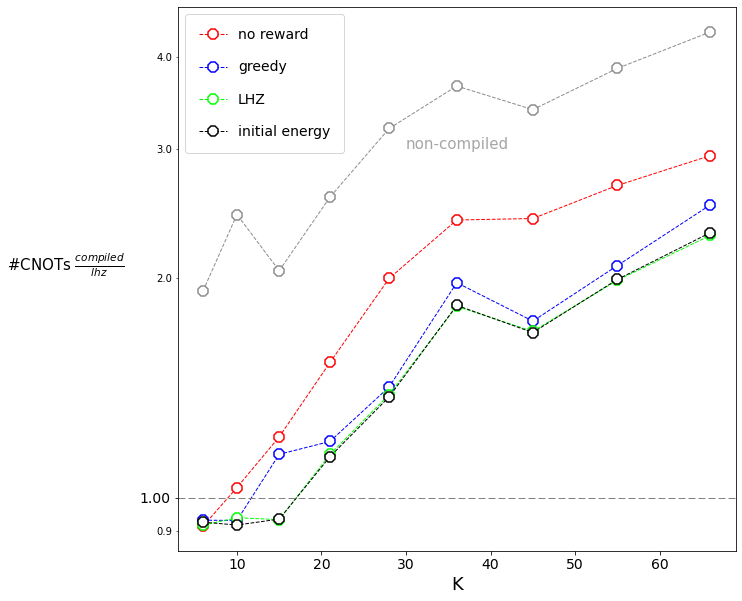

In [7]:
fig, ax = plt.subplots(figsize=(10, 10))
x_axis, y_axis = "K", "CNOT_ratio"
title = "rewards"
legend_title = ""
setting_numbers = [12, 13, 14, 15]
setting_names = ["no reward", r"greedy", "LHZ", "initial energy"]
name = "EnergyForLHZGraphs1"
# advanced_plot_df(df, name, title, setting_names, setting_numbers, legend_title, x_axis, y_axis, ax)
advanced_plot_df(
    df,
    name,
    title,
    setting_names,
    setting_numbers,
    legend_title,
    x_axis,
    y_axis,
    ax,
    compare=True,
    default_lhz=(30, 3),
)

<AxesSubplot:xlabel='K', ylabel='#CNOTs $\\frac{compiled}{lhz}$'>

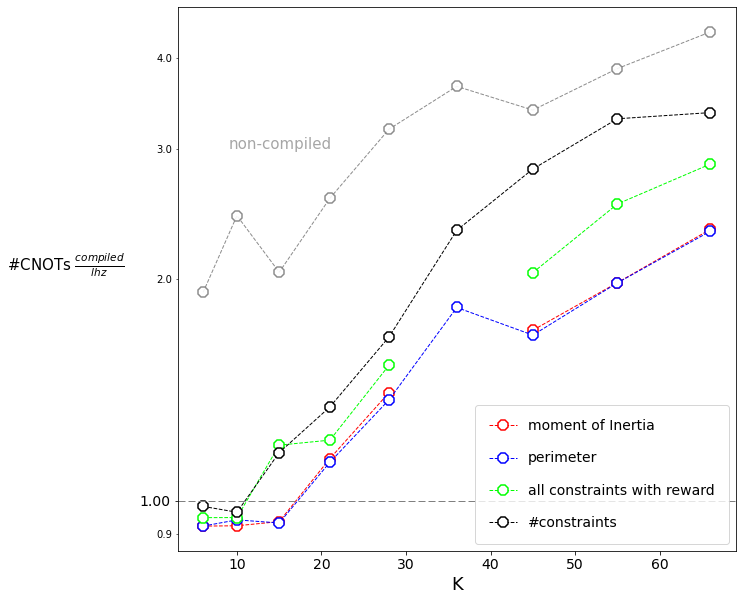

In [8]:
fig, ax = plt.subplots(figsize=(10, 10))
x_axis, y_axis = "K", "CNOT_ratio"
title = "energy functions"
legend_title = ""
setting_numbers = [5, 7, 30, 31]  # replace 30 with 29?
setting_names = [
    "moment of Inertia",
    "perimeter",
    "all constraints with reward",
    "#constraints",
]
name = "EnergyForLHZGraphs1"
# advanced_plot_df(df, name, title, setting_names, setting_numbers, legend_title, x_axis, y_axis, ax)
advanced_plot_df(
    df,
    name,
    title,
    setting_names,
    setting_numbers,
    legend_title,
    x_axis,
    y_axis,
    ax,
    compare=True,
    default_lhz=(9, 3),
)

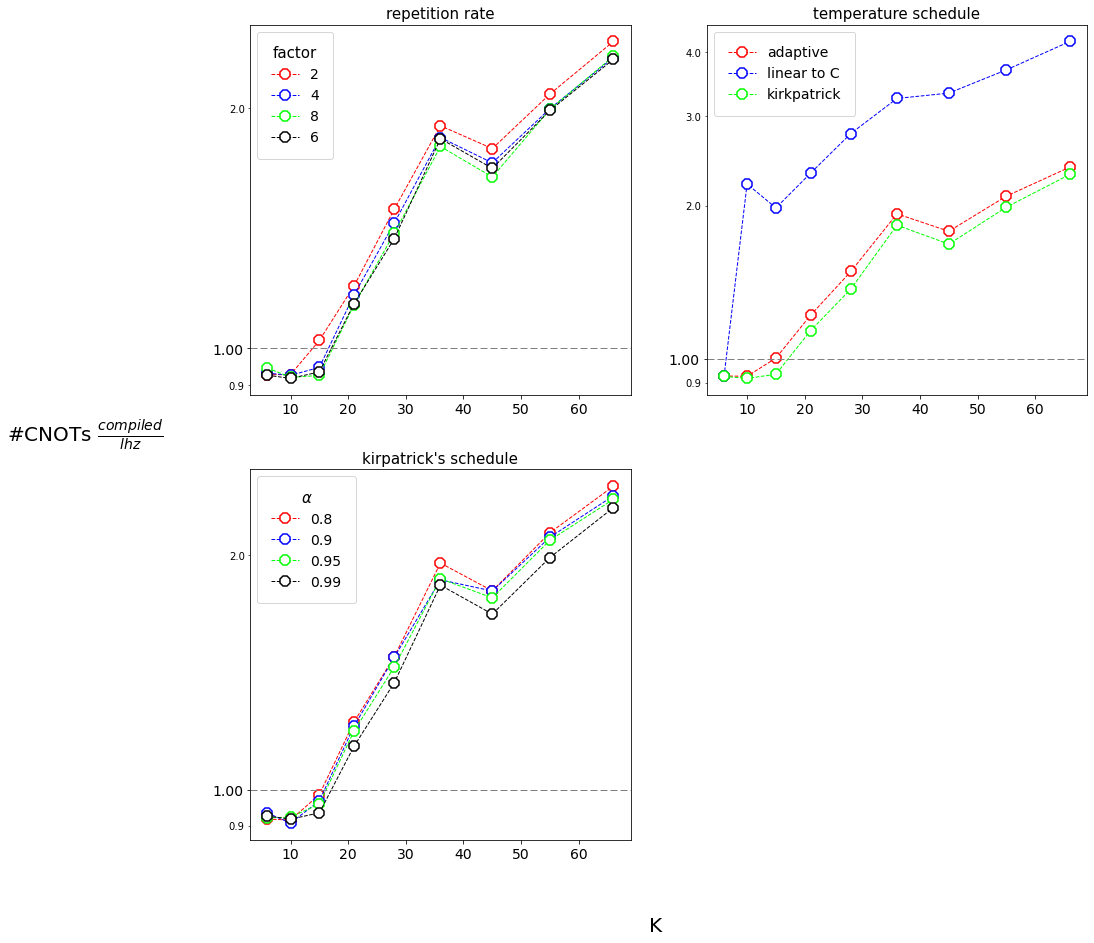

In [9]:
name = "McForLHZGraphs1"
titles = [
    "repetition rate",
    "temperature schedule",
    "kirpatrick's schedule",
    #    "core"
]
all_setting_numbers = [
    [0, 1, 2, 15],
    [3, 6, 15],
    [8, 9, 10, 15],
    #    [11, 15]
]
default_EnergyForLHZGraphs1 = df["EnergyForLHZGraphs1"].loc[
    df["EnergyForLHZGraphs1"]["number_of_setting"].isin([15])
]
df["McForLHZGraphs1"] = df["McForLHZGraphs1"].append(default_EnergyForLHZGraphs1)

all_setting_names = [
    [[2, 4, 8, 6], "factor"],
    [["adaptive", "linear to C", "kirkpatrick"]],
    [[0.8, 0.9, 0.95, 0.99], r"$\alpha$"],
    #    [["with core", "without core"]],
]
all_setting_names = all_setting_names + [[""]] * (
    len(all_setting_numbers) - len(all_setting_names)
)
nx, ny = 2, 2

all_setting_numbers_and_names = zip(all_setting_numbers, all_setting_names)

x_axis, y_axis = "K", "CNOT_ratio"
axs, min_indices = plot_settings_in_subplot(
    df,
    name,
    titles,
    all_setting_numbers_and_names,
    x_axis,
    y_axis,
    nx,
    ny,
    wspace=0.2,
    hspace=0.2,
)
axs[1, 1].set_axis_off()

plt.savefig(paths.plots / f"ThesisFigures/Plots/{name}.pdf", bbox_inches="tight")

# fig, ax = plt.subplots(figsize=(10, 10))
# title = 'min indices'
# legend_title = "legend_title"
# setting_numbers = min_indices
# setting_names= []#["0", r"$10^6$", "LHZ", "INIT"]
# advanced_plot_df(df, name, title, setting_names, setting_numbers, legend_title, x_axis, y_axis, ax)

<AxesSubplot:xlabel='K', ylabel='#CNOTs $\\frac{compiled}{lhz}$'>

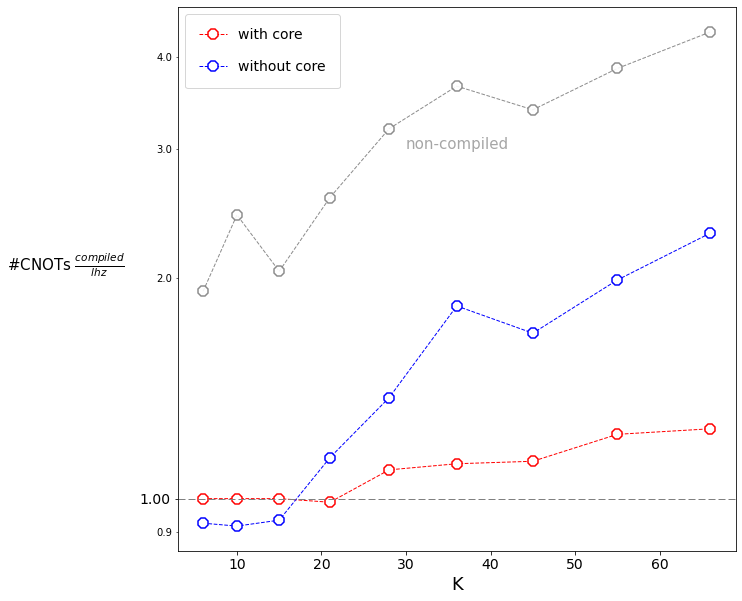

In [10]:
fig, ax = plt.subplots(figsize=(10, 10))
x_axis, y_axis = "K", "CNOT_ratio"
title = "core"
legend_title = ""
setting_numbers = [11, 15]
setting_names = ["with core", "without core"]
name = "McForLHZGraphs1"
# advanced_plot_df(df, name, title, setting_names, setting_numbers, legend_title, x_axis, y_axis, ax)
advanced_plot_df(
    df,
    name,
    title,
    setting_names,
    setting_numbers,
    legend_title,
    x_axis,
    y_axis,
    ax,
    compare=True,
    default_lhz=(30, 3),
)

In [11]:
# name = "AdvancedMcForLHZGraphsWithCore1"
# titles = ["swap only core qbits in line swap", "swap lines", "shell search", "qubit proposal"]
# all_setting_numbers = [[0, 1], [2, 3, 4], [5, 6, 7], [8, 9, 10, 11, 13]]


# all_setting_names = [
#     [["all qubits", "only core qubits"]],
#     [["5%", "10%", "15%"], "probability"],
#     [[50, 200, 500], "shell time"],
#     [["random", "#plaquettes", "plaquette density", "node length", "same node"]],
# ]
# all_setting_names = all_setting_names + [[""]] * (len(all_setting_numbers) - len(all_setting_names))

# nx, ny = 2, 2

# all_setting_numbers_and_names = zip(all_setting_numbers, all_setting_names)

# x_axis, y_axis = 'K', 'CNOT_ratio'
# axs, min_indices = plot_settings_in_subplot(df, name, titles,
#                                             all_setting_numbers_and_names,
#                                             x_axis, y_axis, nx, ny,
#                                             wspace=.2,
#                                             hspace=.2,
# )
# plt.savefig(paths.plots / f"ThesisFigures/Plots/{name}.pdf", bbox_inches='tight')

# # fig, ax = plt.subplots(figsize=(10, 10))
# # title = 'min indices'
# # legend_title = "legend_title"
# # setting_numbers = min_indices
# # setting_names= []#["0", r"$10^6$", "LHZ", "INIT"]
# # advanced_plot_df(df, name, title, setting_names, setting_numbers, legend_title, x_axis, y_axis, ax)

In [12]:
# fig, ax = plt.subplots(figsize=(10, 10))
# x_axis, y_axis = 'K', 'CNOT_ratio'
# title = 'qubit proposals'
# legend_title = "legend_title"
# setting_numbers = [8, 9, 11]
# setting_names= ["random", "#plaquettes weight", "length of lines"]
# name = "AdvancedMcForLHZGraphsWithCore1"
# advanced_plot_df(df, name, title, setting_names, setting_numbers, legend_title, x_axis, y_axis, ax)
# advanced_plot_df(df, name, title, setting_names, setting_numbers, legend_title, x_axis, y_axis, ax, compare=True)

In [13]:
# fig, ax = plt.subplots(figsize=(10, 10))
# x_axis, y_axis = 'K', 'CNOT_ratio'
# title = 'qubit and coordinate proposals'
# legend_title = "legend_title"
# setting_numbers = [8, 9, 11, 12]
# setting_names= ["random", "#plaquettes weight", "node length", "shell search"]
# name = "AdvancedMcForLHZGraphsWithCore1"
# #advanced_plot_df(df, name, title, setting_names, setting_numbers, legend_title, x_axis, y_axis, ax)
# advanced_plot_df(df, name, title, setting_names, setting_numbers, legend_title, x_axis, y_axis, ax, compare=True)

In [14]:
# name = "McForDatabase1"
# titles = ["shell search", "qbit proposal"]
# all_setting_numbers = [[6, 7, 8], [9, 10, 11, 12, 14]]
# all_setting_names = [
#     [[50, 200, 500], "shell time"],
#     [["random", "#plaquettes", "plaquette density", "node length", "same node"]],
# ]
# all_setting_names = all_setting_names + [[""]] * (len(all_setting_numbers) - len(all_setting_names))
# nx, ny = 1, 2

# all_setting_numbers_and_names = zip(all_setting_numbers, all_setting_names)

# x_axis, y_axis = 'K', 'CNOT_ratio'
# axs, min_indices = plot_settings_in_subplot(df, name, titles,
#                                             all_setting_numbers_and_names,
#                                             x_axis, y_axis, nx, ny,
#                                             figsize=(15, 7.5),
#                                             wspace=0.2
#                                            )
# plt.savefig(paths.plots / f"ThesisFigures/Plots/not_to_use_{name}.pdf", bbox_inches='tight')

# # fig, ax = plt.subplots(figsize=(5, 10))
# # title = 'min indices'
# # legend_title = "legend_title"
# # setting_numbers = min_indices
# # setting_names= []#["0", r"$10^6$", "LHZ", "INIT"]
# # advanced_plot_df(df, name, title, setting_names, setting_numbers, legend_title, x_axis, y_axis, ax)